In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory data analysis
Here we start exploring the data to find out how we should proceed. Thus we visualize the data and we look for missing as well as inconsistent entries. We obviously start by uploading our two main tables.

In [2]:
application_train = pd.read_csv("application_train.csv")
application_test = pd.read_csv("application_test.csv")

In [3]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Let's start looking for missing entries and thus choosing how to treat them based on their distribution.

In [4]:
train_null = application_train.isnull()
test_null = application_test.isnull()

print("There's a total of " + str(train_null.sum().sum()) + " missing entries on the application train table.")
print("There's a total of " + str(test_null.sum().sum()) + " missing entries on the application test table.")

del(train_null)
del(test_null)

There's a total of 9152465 missing entries on the application train table.
There's a total of 1404419 missing entries on the application test table.


Since there are a lot of missing values both in the train table as well as in the test table we can't just get rid of rows with NA entries. Instead we must find a way to deal with them (maybe using imputation). We'll come back to it later. For now let's keep going with exploratory data analysis.

We now want to check the types of our features.

In [5]:
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

We see that there are $65$ continous features, $41$ integers features (remember that two of them are, respectively, the ID of the loan and the target outcome) and $16$ categorical features. Let's start by getting some informations on our continous features.

We start noting that a lot of features refer to informations about building where the clients live. Since there are $42$ of them and we would like to reduce the dimensionality of the problem (in sight of better performance and predictive power later on), let's take a look at those featuresm and see if we can get rid of some of them.

In [6]:
building_features = application_train.columns[44 : 86]
building_features = np.append(building_features, "TOTALAREA_MODE")
building_features

array(['APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
       'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE'],
 

In [7]:
build_features_data = application_train[building_features]

In [8]:
build_features_data

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
0,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,...,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149
1,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,...,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,0.0714
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,...,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,0.2898
307507,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,...,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,0.0214
307508,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,...,0.00,0.2069,0.1667,0.2083,NaN,0.0855,0.9445,0.0000,0.0000,0.7970
307509,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,...,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0062,NaN,NaN,0.0086


The first thing we note is that for every building information we have three values: mean, mode and median. We are interested in seeing if these values are highly correlated (as we suspect).

In [9]:
build_data_correlation = build_features_data.corr()

pd.Series(np.diag(build_data_correlation.iloc[range(0, 13), range(14, 27)]), index = [build_data_correlation.index[:13], build_data_correlation.columns[14:27]])

APARTMENTS_AVG               APARTMENTS_MODE                 0.973259
BASEMENTAREA_AVG             BASEMENTAREA_MODE               0.973496
YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MODE    0.971893
YEARS_BUILD_AVG              YEARS_BUILD_MODE                0.989444
COMMONAREA_AVG               COMMONAREA_MODE                 0.977147
ELEVATORS_AVG                ELEVATORS_MODE                  0.978837
ENTRANCES_AVG                ENTRANCES_MODE                  0.977743
FLOORSMAX_AVG                FLOORSMAX_MODE                  0.985689
FLOORSMIN_AVG                FLOORSMIN_MODE                  0.985875
LANDAREA_AVG                 LANDAREA_MODE                   0.973696
LIVINGAPARTMENTS_AVG         LIVINGAPARTMENTS_MODE           0.970117
LIVINGAREA_AVG               LIVINGAREA_MODE                 0.972050
NONLIVINGAPARTMENTS_AVG      NONLIVINGAPARTMENTS_MODE        0.969370
dtype: float64

In [10]:
pd.Series(np.diag(build_data_correlation.iloc[range(0, 13), range(28, 41)]), index = [build_data_correlation.index[:13], build_data_correlation.columns[28:41]])

APARTMENTS_AVG               APARTMENTS_MEDI                 0.995081
BASEMENTAREA_AVG             BASEMENTAREA_MEDI               0.994317
YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI    0.993825
YEARS_BUILD_AVG              YEARS_BUILD_MEDI                0.998495
COMMONAREA_AVG               COMMONAREA_MEDI                 0.995978
ELEVATORS_AVG                ELEVATORS_MEDI                  0.996099
ENTRANCES_AVG                ENTRANCES_MEDI                  0.996886
FLOORSMAX_AVG                FLOORSMAX_MEDI                  0.997034
FLOORSMIN_AVG                FLOORSMIN_MEDI                  0.997241
LANDAREA_AVG                 LANDAREA_MEDI                   0.991610
LIVINGAPARTMENTS_AVG         LIVINGAPARTMENTS_MEDI           0.993825
LIVINGAREA_AVG               LIVINGAREA_MEDI                 0.995596
NONLIVINGAPARTMENTS_AVG      NONLIVINGAPARTMENTS_MEDI        0.990768
dtype: float64

We actually see a lot of correlation, for every building information, between mean, mode and median. This suggests us we can actually use just one of them and get rid of the others.

Thus we're going to restrict our building informatin features to just the means.

In [11]:
building_features = build_features_data.columns[:13]
building_features = np.append(building_features, "TOTALAREA_MODE")
building_features

array(['APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'TOTALAREA_MODE'], dtype=object)

In [12]:
build_features_data = build_features_data[building_features]

In [13]:
build_features_data

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,TOTALAREA_MODE
0,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0149
1,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0714
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.2898
307507,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0214
307508,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.7970
307509,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0061,NaN,0.0086


We now look if there are other high correlations between these "new" features.

(14.5, -0.5)

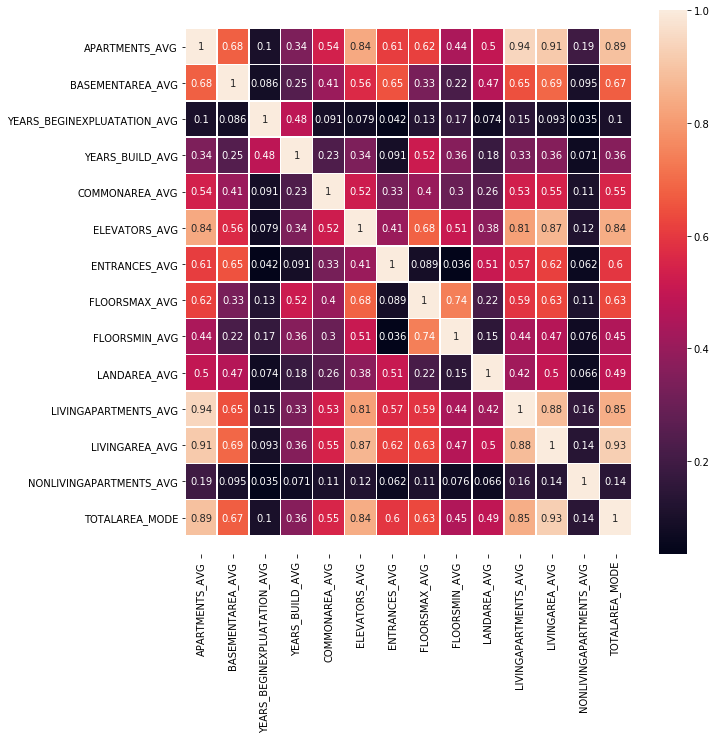

In [14]:
plt.figure(figsize = (10, 10))
ax = sns.heatmap(build_features_data.corr(), annot = True, linewidths = 0.5)
ax.set_ylim(len(build_features_data.corr().columns) + 0.5, -0.5)

We get a bunch of information: first of all features APARTMENTS_AVG, ELEVATORS_AVG, LIVINGAPARTMENTS_AVG, TOTALAREA_MODE and LIVINGAREA_AVG are all correlated and we should just keep one of them.

The same can be said for FLOORSMAX_AVG and FLOORSMIN_AVG.

To choose which of the said features we want to mantain, we're going to look at the standard deviation as well as at the missing values and save the ones with a nice tradeoff of high variance and poor missing entries.

In [15]:
build_features_data.std()

APARTMENTS_AVG                 0.108240
BASEMENTAREA_AVG               0.082438
YEARS_BEGINEXPLUATATION_AVG    0.059223
YEARS_BUILD_AVG                0.113280
COMMONAREA_AVG                 0.076036
ELEVATORS_AVG                  0.134576
ENTRANCES_AVG                  0.100049
FLOORSMAX_AVG                  0.144641
FLOORSMIN_AVG                  0.161380
LANDAREA_AVG                   0.081184
LIVINGAPARTMENTS_AVG           0.092576
LIVINGAREA_AVG                 0.110565
NONLIVINGAPARTMENTS_AVG        0.047732
TOTALAREA_MODE                 0.107462
dtype: float64

In [16]:
build_features_data.isnull().sum()

APARTMENTS_AVG                 156061
BASEMENTAREA_AVG               179943
YEARS_BEGINEXPLUATATION_AVG    150007
YEARS_BUILD_AVG                204488
COMMONAREA_AVG                 214865
ELEVATORS_AVG                  163891
ENTRANCES_AVG                  154828
FLOORSMAX_AVG                  153020
FLOORSMIN_AVG                  208642
LANDAREA_AVG                   182590
LIVINGAPARTMENTS_AVG           210199
LIVINGAREA_AVG                 154350
NONLIVINGAPARTMENTS_AVG        213514
TOTALAREA_MODE                 148431
dtype: int64

We thus choose to keep LIVINGAREA_AVG and FLOORSMAX_AVG.

In [17]:
building_features = np.delete(building_features, [0, 5, 8, 10, 13])
building_features

array(['BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG'], dtype=object)

In [18]:
build_features_data = build_features_data[building_features]

In [19]:
build_features_data

,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG
0,0.0369,0.9722,0.6192,0.0143,0.0690,0.0833,0.0369,0.0190,0.0000
1,0.0529,0.9851,0.7960,0.0605,0.0345,0.2917,0.0130,0.0549,0.0039
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
307506,0.0887,0.9876,0.8300,0.0202,0.1034,0.6042,0.0594,0.1965,0.0753
307507,0.0435,0.9727,0.6260,0.0022,0.1034,0.0833,0.0579,0.0257,0.0000
307508,0.0862,0.9816,0.7484,0.0123,0.2069,0.1667,NaN,0.9279,0.0000
307509,NaN,0.9771,NaN,NaN,0.0690,0.0417,NaN,0.0061,NaN


We now want to treat missing values. Before choosing how to impute them it's better to check if there's a correlation between missing entries and target value.

In [20]:
def check_missing_value_distributions(dataframe, columns, target_vector):
    observations = len(target_vector)
    sns.set()
    for feature in columns:
        target_not_missing = 0
        target_missing = 0
        for row in dataframe.iterrows():
            if(np.isnan(row[1][feature])):
                target_missing = target_missing + target_vector[row[0]]
            else:
                target_not_missing = target_not_missing + target_vector[row[0]]
        f, axes = plt.subplots(1, 2, figsize = (20, 7))
        f.suptitle(feature)
        axes[0].set_title("Not missing values")
        axes[1].set_title("Missing values")
        sns.barplot(x = [0, 1], y = [(observations - target_not_missing) * (100 / observations), target_not_missing * (100 / observations)], ax = axes[0])
        sns.barplot(x = [0, 1], y = [(observations - target_missing) * (100 / observations), target_missing * (100 / observations)], ax = axes[1])

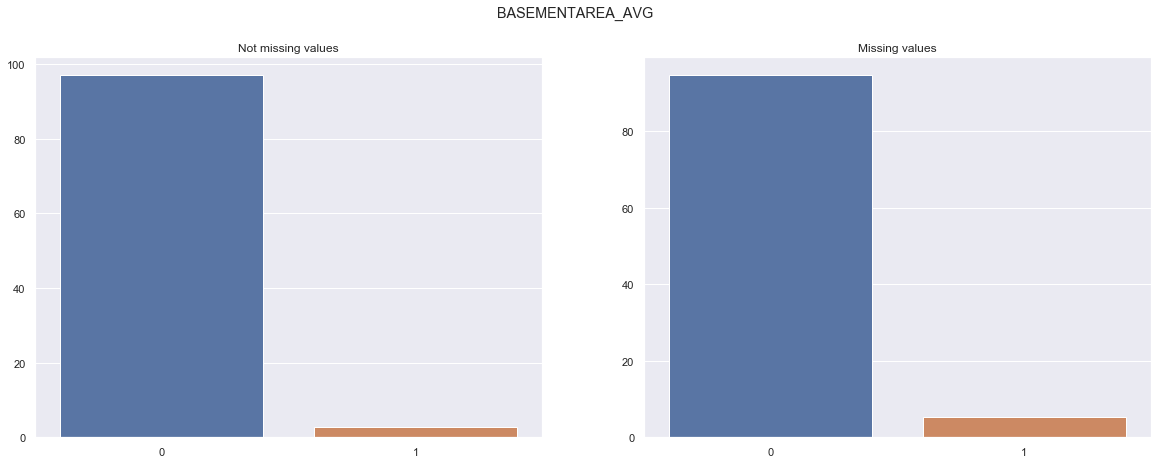

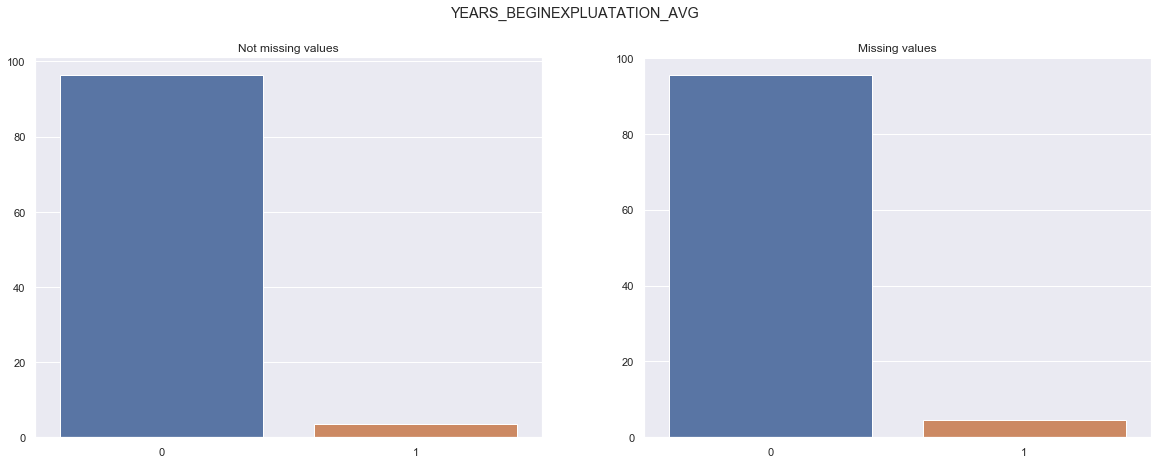

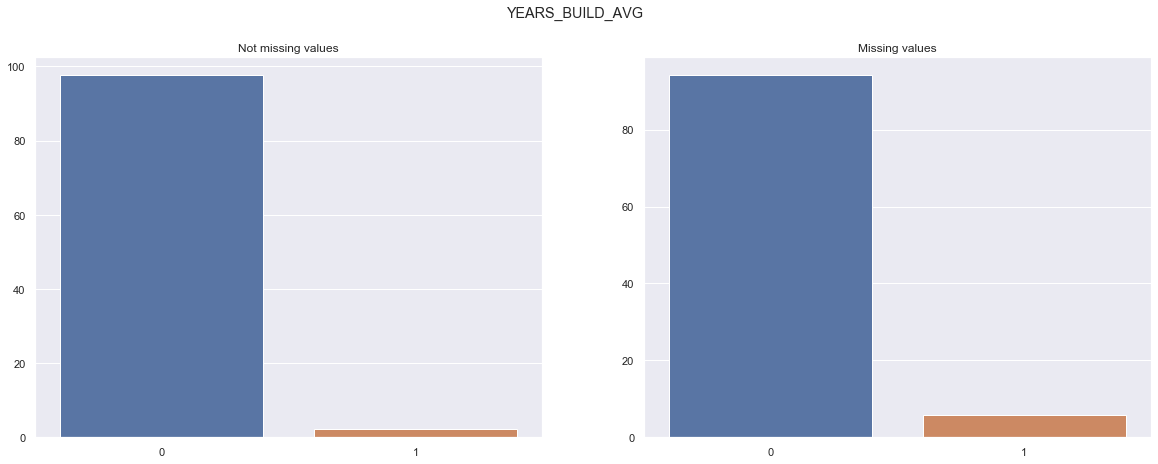

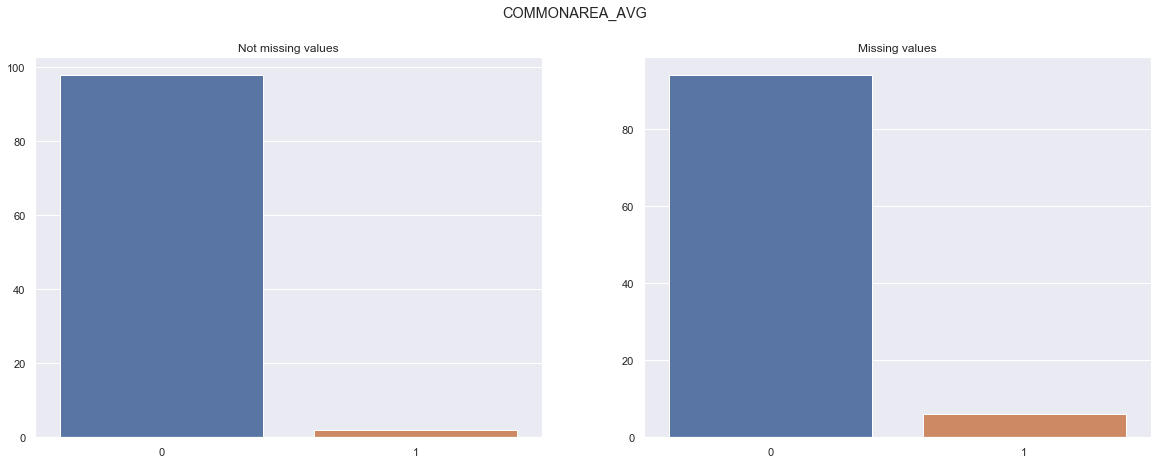

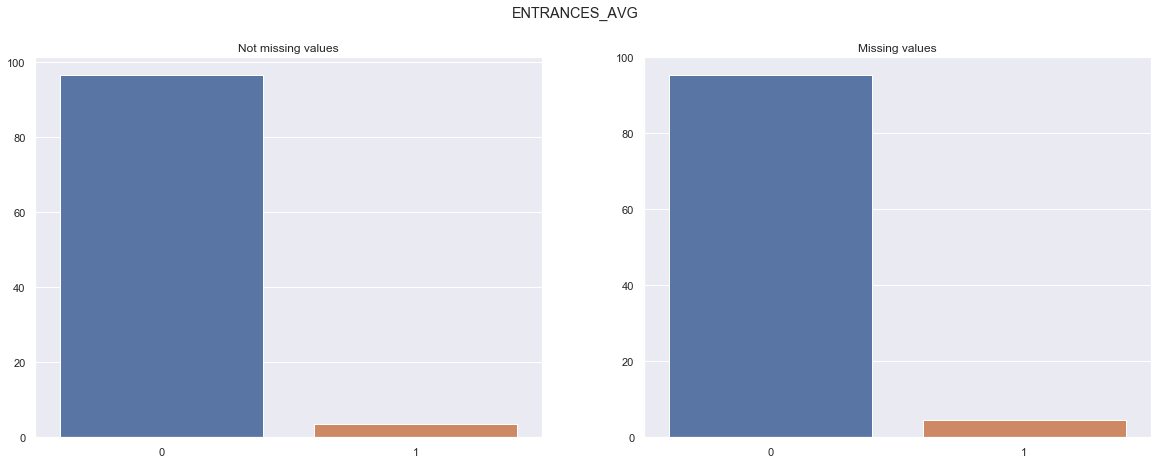

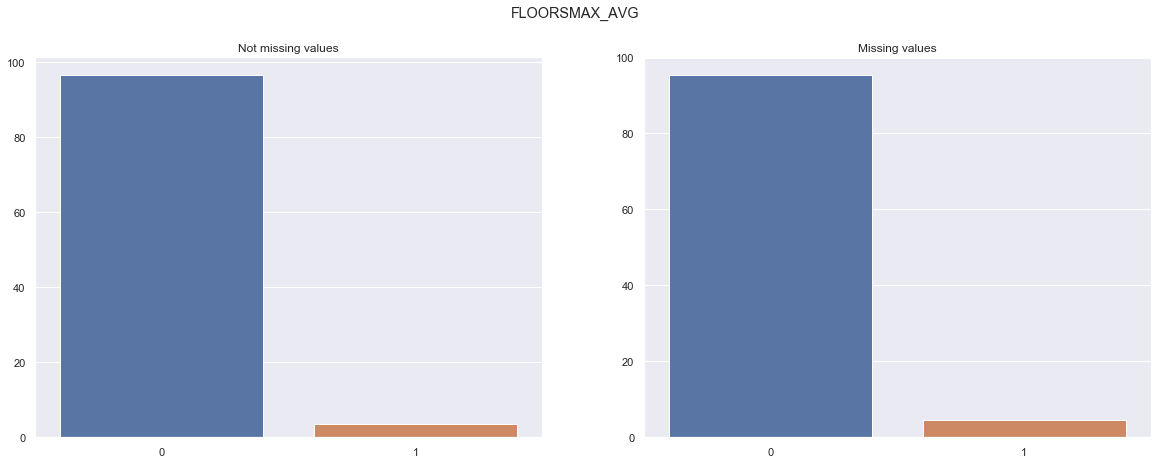

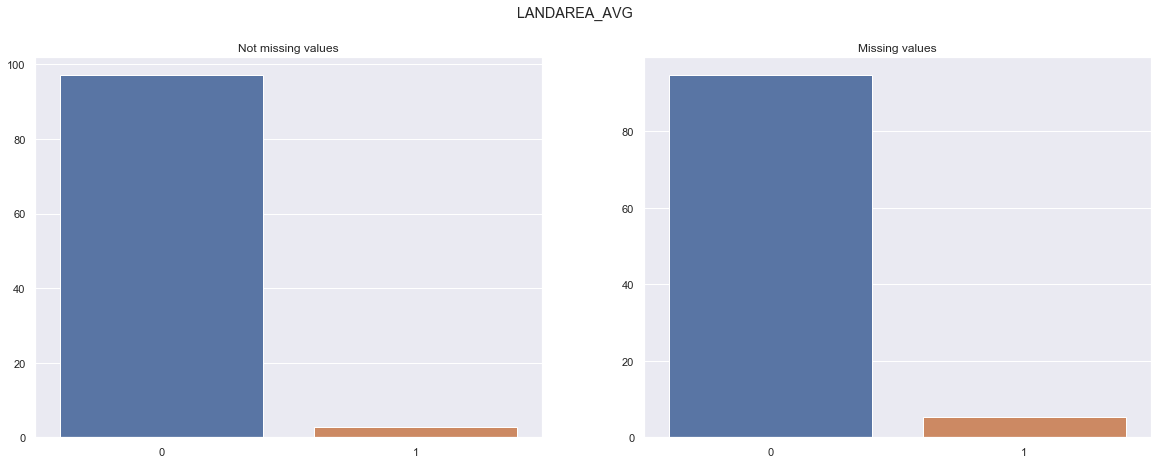

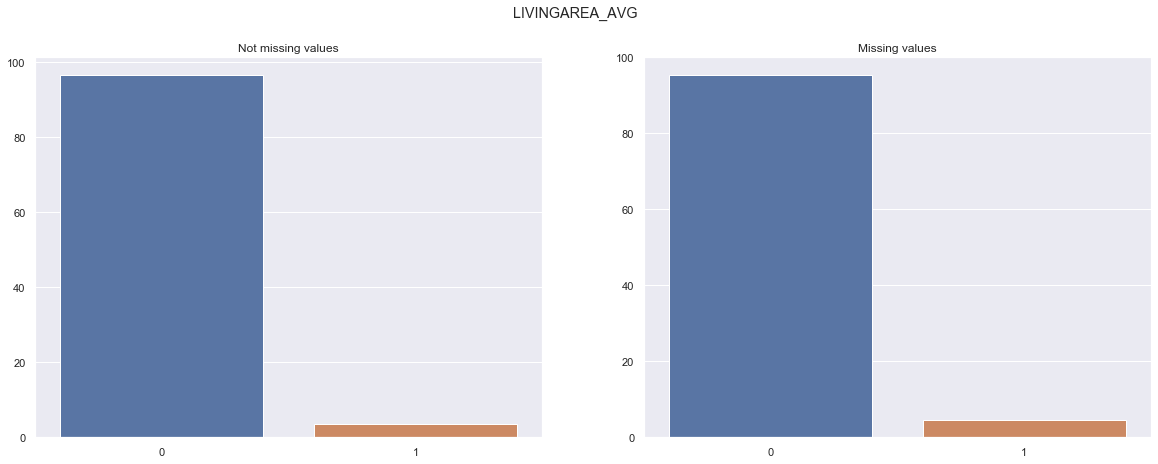

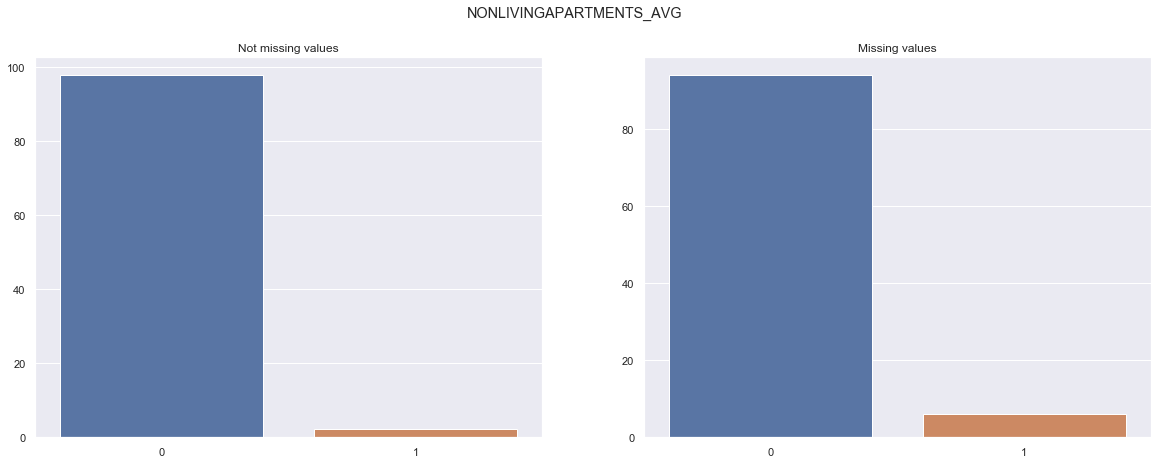

In [21]:
check_missing_value_distributions(build_features_data, building_features, application_train['TARGET'])

In [22]:
def count_missing_values(dataframe, columns):
    to_return = []
    for row in dataframe.iterrows():
        count = 0
        for feature in columns:
            if(np.isnan(row[1][feature])):
                count = count + 1
        to_return.append(count)
    return(to_return)

In [23]:
missing_features_column = count_missing_values(application_train, building_features)

In [24]:
application_train["MISSING BUILDING DATA"] = missing_features_column

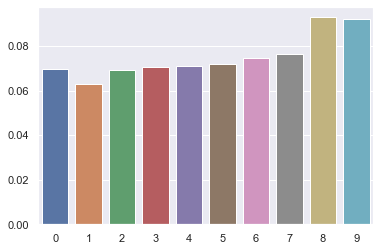

In [25]:
miss_building_and_target = []
for index in range(10):
    current = application_train["TARGET"][application_train["MISSING BUILDING DATA"] == index]
    try:
        miss_building_and_target.append(sum(current) / len(current))
    except:
        miss_building_and_target.append(0)

sns.barplot(x = list(range(10)), y = miss_building_and_target)

Since it seems there's an increase in the percentage of zero targets when a lot of values are missing we normalize our column so to add a feature.

In [26]:
application_train["MISSING BUILDING DATA"] = application_train["MISSING BUILDING DATA"] > 7

In [27]:
application_train["MISSING BUILDING DATA"]

0         False
1         False
2          True
3          True
4          True
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Name: MISSING BUILDING DATA, Length: 307511, dtype: bool

In [28]:
missing_features_column = count_missing_values(application_test, building_features)
application_test["MISSING BUILDING DATA"] = missing_features_column
application_test["MISSING BUILDING DATA"] = application_test["MISSING BUILDING DATA"] > 7

Now let's work on other features.

In [29]:
application_train.select_dtypes('float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [30]:
application_train.select_dtypes('int64').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [31]:
enquiries_features = application_train.columns[116:122]
enquiries_features

Index(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [32]:
enquiries_data = application_train[enquiries_features]
enquiries_data

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN
307507,NaN,NaN,NaN,NaN,NaN,NaN
307508,1.0,0.0,0.0,1.0,0.0,1.0
307509,0.0,0.0,0.0,0.0,0.0,0.0


(6.5, -0.5)

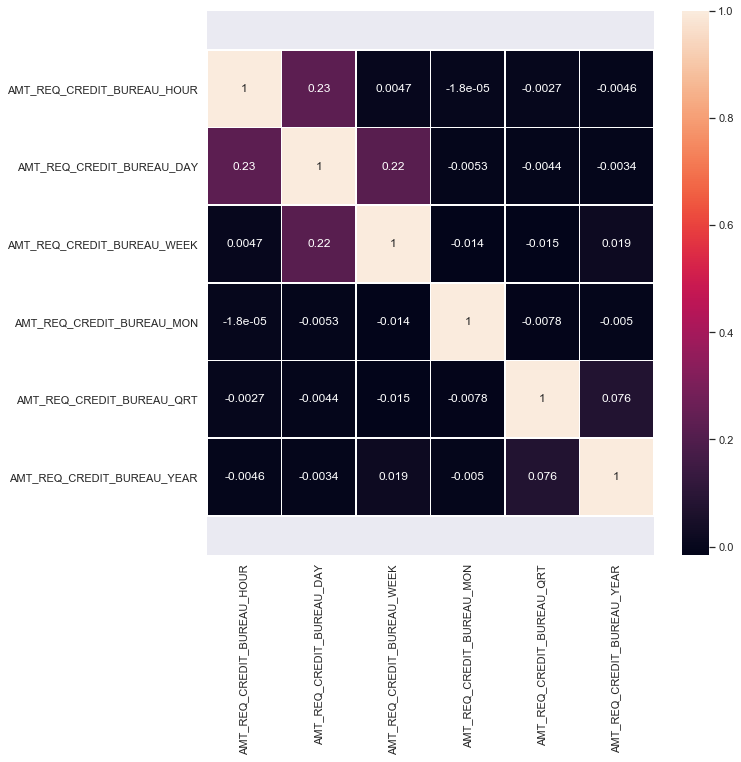

In [33]:
plt.figure(figsize = (10, 10))
ax = sns.heatmap(enquiries_data.corr(), annot = True, linewidths = 0.5)
ax.set_ylim(len(enquiries_data.corr().columns) + 0.5, -0.5)

In [34]:
enquiries_missing = count_missing_values(enquiries_data, enquiries_data.columns)
set(enquiries_missing)

{0, 6}

In [35]:
application_train["ENQUIRIES MISSING DATA"] = enquiries_missing

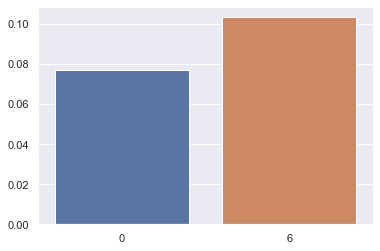

In [36]:
miss_building_and_target = []
for index in range(2):
    current = application_train["TARGET"][application_train["ENQUIRIES MISSING DATA"] == index * 6]
    try:
        miss_building_and_target.append(sum(current) / len(current))
    except:
        miss_building_and_target.append(0)

sns.barplot(x = [0, 6], y = miss_building_and_target)

In [37]:
enquiries_data.isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [38]:
social_features = application_train.columns[91:95]
social_features

Index(['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')

In [39]:
social_features_data = application_train[social_features]
social_features_data

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,2.0,2.0,2.0,2.0
1,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0
3,2.0,0.0,2.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
307506,0.0,0.0,0.0,0.0
307507,0.0,0.0,0.0,0.0
307508,6.0,0.0,6.0,0.0
307509,0.0,0.0,0.0,0.0


(4.5, -0.5)

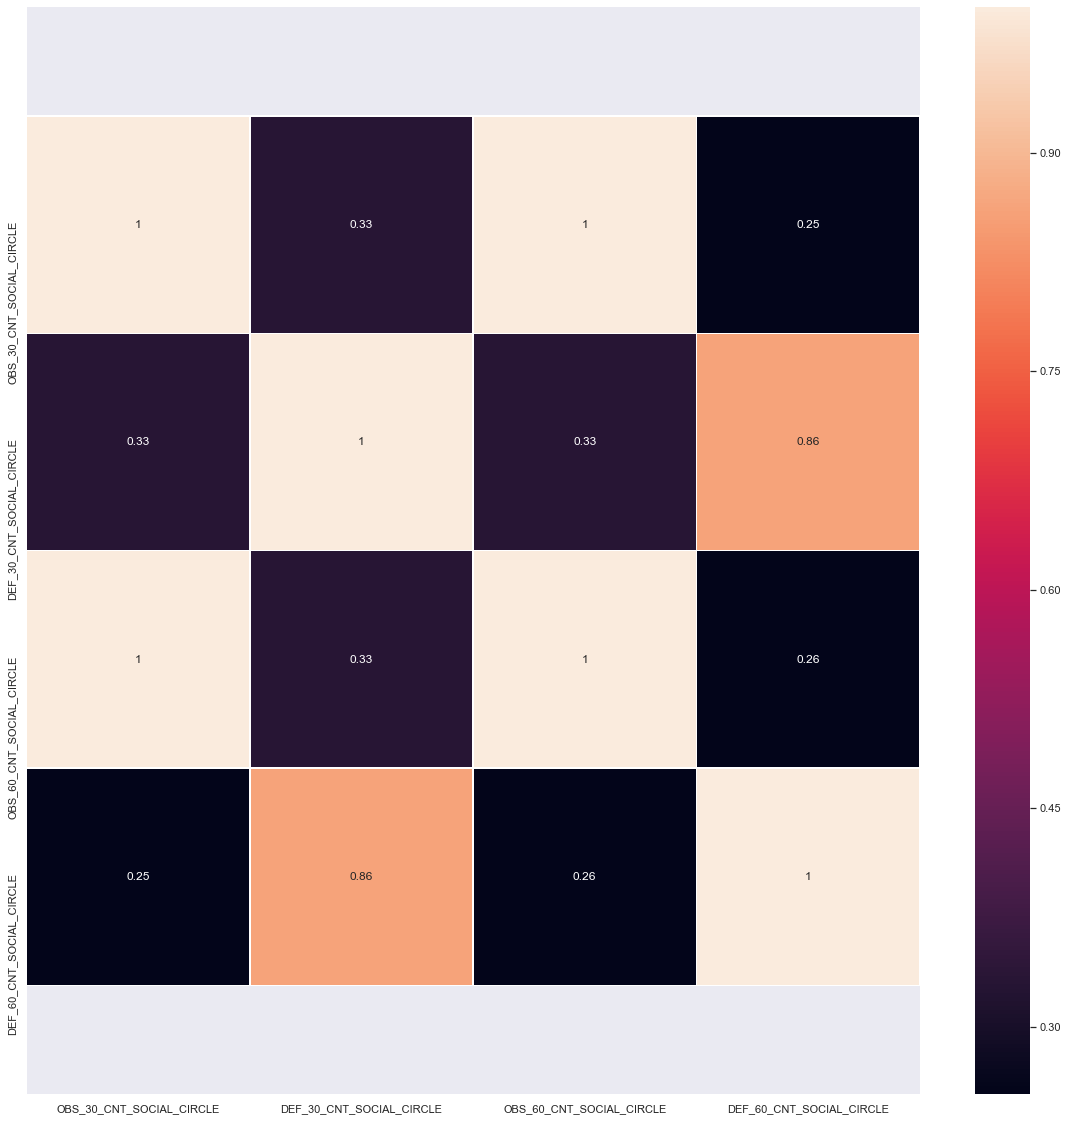

In [40]:
plt.figure(figsize = (20, 20))
ax = sns.heatmap(social_features_data.corr(), annot = True, linewidths = 0.5)
ax.set_ylim(len(social_features_data.corr().columns) + 0.5, -0.5)

In [41]:
social_features_data.std()

OBS_30_CNT_SOCIAL_CIRCLE    2.400989
DEF_30_CNT_SOCIAL_CIRCLE    0.446698
OBS_60_CNT_SOCIAL_CIRCLE    2.379803
DEF_60_CNT_SOCIAL_CIRCLE    0.362291
dtype: float64

In [42]:
social_features = ["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE"]
social_features_data = social_features_data[social_features]

In [43]:
social_features_data

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE
0,2.0,2.0
1,1.0,0.0
2,0.0,0.0
3,2.0,0.0
4,0.0,0.0
...,...,...
307506,0.0,0.0
307507,0.0,0.0
307508,6.0,0.0
307509,0.0,0.0


In [44]:
social_missing = count_missing_values(social_features_data, social_features_data.columns)
set(social_missing)

{0, 2}

In [45]:
application_train["SOCIAL MISSING DATA"] = social_missing

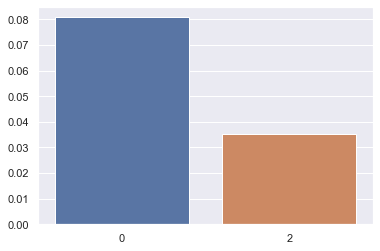

In [46]:
miss_building_and_target = []
for index in range(2):
    current = application_train["TARGET"][application_train["SOCIAL MISSING DATA"] == index * 2]
    try:
        miss_building_and_target.append(sum(current) / len(current))
    except:
        miss_building_and_target.append(0)

sns.barplot(x = [0, 2], y = miss_building_and_target)

In [47]:
social_features_data.isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
dtype: int64

Since there too poor missing values we prefer to not add "MISSING SOCIAL DATA" column.

In [48]:
main_features = application_train.select_dtypes("float64").columns[:8]
main_features = np.append(main_features, application_train.select_dtypes("int64").columns[2:6])
main_features

array(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH'], dtype=object)

In [49]:
main_data = application_train[main_features]
main_data

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0,-9461,-637,-2120
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0,-16765,-1188,-291
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,0,-19046,-225,-2531
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,0,-19005,-3039,-2437
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,NaN,1.0,0,-19932,-3038,-3458
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,NaN,1.0,0,-9327,-236,-1982
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,NaN,1.0,0,-20775,365243,-4090
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,NaN,1.0,0,-14966,-7921,-5150
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,NaN,2.0,0,-11961,-4786,-931


(12.5, -0.5)

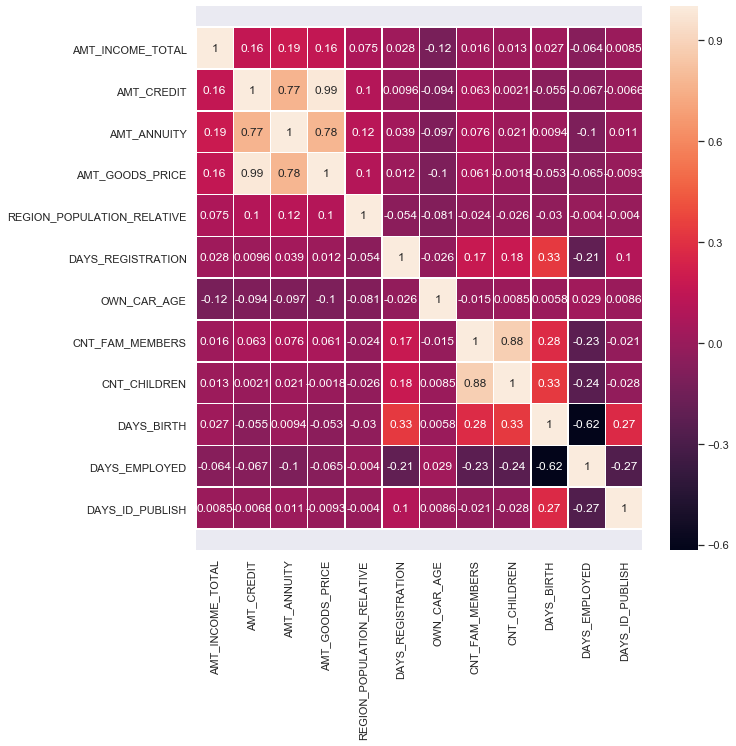

In [50]:
plt.figure(figsize = (10, 10))
ax = sns.heatmap(main_data.corr(), annot = True, linewidths = 0.5)
ax.set_ylim(len(main_data.corr().columns) + 0.5, -0.5)

Since AMT_CREDIT and AMT_ANNUITY are highly correlated we are tempted to remove the AMT_ANNUITY feature. But considered it seemes to be a relevant information we prefer to encapsulate this feature in a new parameter: AMT_ANNUITY / AMT_CREDIT.

We do something similar for CNT_FAM_MEMBERS and CNT_CHILDREN where we create a new parameter: NOT_CHILDREN_FAM_MEMBERS.

In [51]:
application_train["PERCENTAGE ANNUITY"] = application_train["AMT_ANNUITY"] / application_train["AMT_CREDIT"]
application_train[["AMT_CREDIT", "AMT_ANNUITY", "PERCENTAGE ANNUITY"]].corr()

,AMT_CREDIT,AMT_ANNUITY,PERCENTAGE ANNUITY
AMT_CREDIT,1.000000,0.770138,-0.558789
AMT_ANNUITY,0.770138,1.000000,-0.063489
PERCENTAGE ANNUITY,-0.558789,-0.063489,1.000000


In [52]:
application_train["NOT_CHILDREN_FAM_MEMBERS"] = application_train["CNT_FAM_MEMBERS"] - application_train["CNT_CHILDREN"]
application_train[["NOT_CHILDREN_FAM_MEMBERS", "CNT_FAM_MEMBERS", "CNT_CHILDREN"]].corr()

,NOT_CHILDREN_FAM_MEMBERS,CNT_FAM_MEMBERS,CNT_CHILDREN
NOT_CHILDREN_FAM_MEMBERS,1.00000,0.625430,0.178030
CNT_FAM_MEMBERS,0.62543,1.000000,0.879161
CNT_CHILDREN,0.17803,0.879161,1.000000


In [53]:
main_features = np.delete(main_features, [2, 3, 7])
main_features

array(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE',
       'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_CHILDREN', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH'], dtype=object)

In [54]:
main_features = np.append(main_features, "PERCENTAGE ANNUITY")
main_features = np.append(main_features, "NOT_CHILDREN_FAM_MEMBERS")
main_features

array(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE',
       'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_CHILDREN', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'PERCENTAGE ANNUITY',
       'NOT_CHILDREN_FAM_MEMBERS'], dtype=object)

In [55]:
application_test["PERCENTAGE ANNUITY"] = application_test["AMT_ANNUITY"] / application_test["AMT_CREDIT"]
application_test["NOT_CHILDREN_FAM_MEMBERS"] = application_test["CNT_FAM_MEMBERS"] - application_test["CNT_CHILDREN"]

In [56]:
main_data = application_train[main_features]
main_data

,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,PERCENTAGE ANNUITY,NOT_CHILDREN_FAM_MEMBERS
0,202500.0,406597.5,0.018801,-3648.0,NaN,0,-9461,-637,-2120,0.060749,1.0
1,270000.0,1293502.5,0.003541,-1186.0,NaN,0,-16765,-1188,-291,0.027598,2.0
2,67500.0,135000.0,0.010032,-4260.0,26.0,0,-19046,-225,-2531,0.050000,1.0
3,135000.0,312682.5,0.008019,-9833.0,NaN,0,-19005,-3039,-2437,0.094941,2.0
4,121500.0,513000.0,0.028663,-4311.0,NaN,0,-19932,-3038,-3458,0.042623,1.0
...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,0.032561,-8456.0,NaN,0,-9327,-236,-1982,0.108198,1.0
307507,72000.0,269550.0,0.025164,-4388.0,NaN,0,-20775,365243,-4090,0.044524,1.0
307508,153000.0,677664.0,0.005002,-6737.0,NaN,0,-14966,-7921,-5150,0.044239,1.0
307509,171000.0,370107.0,0.005313,-2562.0,NaN,0,-11961,-4786,-931,0.054592,2.0


In [ ]:
check_missing_value_distributions(application_train, main_features, application_train['TARGET'])

In [ ]:
main_data.isnull().sum()

In [ ]:
own_car_null = count_missing_values(application_train, ["OWN_CAR_AGE"])

In [ ]:
application_train["OWN_CAR_NULL"] = own_car_null

In [ ]:
own_car_null = count_missing_values(application_test, ["OWN_CAR_AGE"])
application_test["OWN_CAR_NULL"] = own_car_null

In [ ]:
ext_features = application_train.select_dtypes("float64").columns[8:11]
ext_features

In [ ]:
ext_data = application_train[ext_features]
ext_data

In [ ]:
plt.figure(figsize = (10, 10))
ax = sns.heatmap(ext_data.corr(), annot = True, linewidths = 0.5)
ax.set_ylim(len(ext_data.corr().columns) + 0.5, -0.5)

In [ ]:
check_missing_value_distributions(application_train, ext_features, application_train['TARGET'])

In [ ]:
ext_data.isnull().sum()

In [ ]:
flag_features = application_train.select_dtypes('int64').columns[21:-2]
flag_features = np.append(flag_features, application_train.select_dtypes('int64').columns[6:12])
flag_features

In [ ]:
flag_document_data = application_train[flag_features]

In [ ]:
plt.figure(figsize = (30, 30))
ax = sns.heatmap(flag_document_data.corr(), annot = True, linewidths = 0.5)
ax.set_ylim(len(flag_document_data.corr().columns) + 0.5, -0.5)

In [ ]:
last_features = application_train.select_dtypes("int64").columns[12:21]
last_features

In [ ]:
last_data = application_train[last_features]

In [ ]:
plt.figure(figsize = (20, 20))
ax = sns.heatmap(last_data.corr(), annot = True, linewidths = 0.5)
ax.set_ylim(len(last_data.corr().columns) + 0.5, -0.5)

In [ ]:
last_data.isnull().sum()

In [ ]:
last_data.std()

In [ ]:
last_features = np.delete(last_features, [1, 3, 8])
last_features

---
# Final dataset
We can finally setup all the features of our data set.

In [ ]:
all_features = building_features
all_features = np.append(all_features, "SK_ID_CURR")
all_features = np.append(all_features, "MISSING BUILDING DATA")
all_features = np.append(all_features, enquiries_features)
all_features = np.append(all_features, social_features)
all_features = np.append(all_features, main_features)
all_features = np.append(all_features, "OWN_CAR_NULL")
all_features = np.append(all_features, ext_features)
all_features = np.append(all_features, flag_features)
all_features = np.append(all_features, last_features)
all_features = np.append(all_features, application_train.select_dtypes('object').columns)
all_features

In [ ]:
np.where(all_features == 'ENQUIRIES MISSING DATA')

#all_features[53]
#np.where(all_features == 'SK_ID_CURR')

In [ ]:
import numpy as np
all_features = np.delete(all_features,54)
#all_features['ENQUIRIES MISSING DATA'] 

In [ ]:
np.where(all_features == 'ENQUIRIES MISSING DATA')

In [ ]:
final_application_train = application_train[np.append(all_features, "TARGET")]
final_application_test = application_test[all_features]

In [ ]:
final_application_train.head()

In [ ]:
final_application_test.head()

In [ ]:
final_application_train.info()

# Let's upload our other datasets

In [ ]:
bureau = pd.read_csv('bureau.csv')
bureau.head()

In [ ]:
bureau_balance = pd.read_csv('bureau_balance.csv')
bureau_balance.head()

In [ ]:
pos_cash_bal = pd.read_csv('POS_CASH_balance.csv')
pos_cash_bal.head()

In [ ]:
credit_card_bal= pd.read_csv('credit_card_balance.csv')
credit_card_bal.head()

In [ ]:
previous_app = pd.read_csv('previous_application.csv')
previous_app.head()

In [ ]:
installments_pay = pd.read_csv('installments_payments.csv')
installments_pay.head()

## A function to get some feature from that datasets.

In [ ]:
def condenser(df, apptr, persons, col):
    col.remove('SK_ID_CURR')
    k = 0
    for i in persons:
        case = df.loc[df['SK_ID_CURR']==i]
        for c in col:
            apptr.at[k,c] = sum(case[c])
        k = k + 1
    return apptr

# And us getting them
<br> Here we clean the datasets of Na's and add the new features fromn the otther datasets, after an imputation we will be ready to use our predictive method!

In [ ]:
import sys
import numpy as np

final_application_train = pd.get_dummies(final_application_train)
final_application_test = pd.get_dummies(final_application_test)
#from bureau


bureau2 = bureau[['SK_ID_CURR', 'CREDIT_ACTIVE','AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM_DEBT',
              'CREDIT_TYPE']].copy()
bureau2 = pd.get_dummies(bureau2)

for i in range(1,22):
    final_application_train[bureau2.columns[i]] = np.nan
    final_application_test[bureau2.columns[i]] = np.nan
    
ids = list(final_application_train.loc[:,'SK_ID_CURR']) 
idstest = list(final_application_test.loc[:,'SK_ID_CURR']) 
cl = list(bureau2.columns)
final_application_train = condenser(bureau2, final_application_train, ids, cl )
cl = list(bureau2.columns)
final_application_test = condenser(bureau2, final_application_test, ids, cl )
#final_application_train.head()  

#from credit
credit_card_bal2 = credit_card_bal[['SK_ID_CURR', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL',
                                    'AMT_PAYMENT_TOTAL_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT' ]].copy()
for i in range(1,5):
    final_application_train[credit_card_bal2.columns[i]] = np.nan
    final_application_test[credit_card_bal2.columns[i]] = np.nan
cl = list(credit_card_bal2.columns)
final_application_train = condenser(credit_card_bal2, final_application_train, ids, cl )  
cl = list(credit_card_bal2.columns)
final_application_test = condenser(credit_card_bal2, final_application_test, idstest, cl )
#final_application_train.head()   

#from previous app
previous_app2 = previous_app[['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_CREDIT', 'RATE_INTEREST_PRIMARY', 'DAYS_TERMINATION']].copy()
for i in range(1,5):
    final_application_train[previous_app2.columns[i]] = np.nan
    final_application_test[previous_app2.columns[i]] = np.nan
cl = list(previous_app2.columns)
final_application_train = condenser(previous_app2, final_application_train, ids, cl ) 
cl = list(previous_app2.columns)
final_application_test = condenser(previous_app2, final_application_test, idstest, cl )
#final_application_train.head()

Imputation

In [ ]:
#In this i check the na, impute and encode the cathegorcial variables
def Checkimputandencode(df):
    for colum in df.columns:
        if df[colum].dtype.name == 'int64':
            df[colum] = df[colum].fillna(int(round(df[colum].mean())))
        elif df[colum].dtype.name == 'float64':
            df[colum] = df[colum].fillna(df[colum].mean())
        elif df[colum].dtype.name == 'bool':
            df[colum] = df[colum]*1        
    df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
    df = pd.get_dummies(df)
    return df

In [ ]:
final_application_train.to = Checkimputandencode(final_application_train)
final_application_test.to = Checkimputandencode(final_application_test)

In [ ]:
final_application_train.to_csv("selected_features_train.csv")
final_application_test.to_csv("selected_features_test.csv")

# NOw K-fold

In [ ]:
data =final_application_train.loc[:, final_application_train.columns != 'TARGET']
y = final_application_train['TARGET']
data.shape, y.shape

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
model = svm.SVC()
#Should I put here model2,3,4 about random forest etc and see whart score is better?????
accuracy = cross_val_score(model, data, y, scoring='accuracy', cv = 10)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)                    